In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [79]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-05-22 12:51:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-22 12:51:28 (95.4 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [80]:
model = Sequential()
model.add(Embedding(total_words, 200, input_length= max_sequence_len-1))   # Your Embedding Layer
model.add(Bidirectional(LSTM(200, return_sequences= True)))   # An LSTM Layer
model.add(Dropout(0.2))   # A dropout layer
model.add(Bidirectional(GRU(150)))   # Another LSTM Layer
model.add(Dense(total_words/2, activation= 'relu', kernel_regularizer=regularizers.l2(0.01)))   # A Dense Layer including regularizers
model.add(Dense(total_words, activation= 'softmax'))   # A Dense Layer
# Pick an optimizer
model.compile(loss= 'categorical_crossentropy', optimizer= Adam(learning_rate= 0.001), metrics= ['accuracy'])   # Pick a loss function and an optimizer
print(model.summary())


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 10, 200)           642200    
_________________________________________________________________
bidirectional_48 (Bidirectio (None, 10, 400)           641600    
_________________________________________________________________
dropout_29 (Dropout)         (None, 10, 400)           0         
_________________________________________________________________
bidirectional_49 (Bidirectio (None, 300)               496800    
_________________________________________________________________
dense_53 (Dense)             (None, 1605)              483105    
_________________________________________________________________
dense_54 (Dense)             (None, 3211)              5156866   
Total params: 7,420,571
Trainable params: 7,420,571
Non-trainable params: 0
___________________________________________

In [81]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 17s 35ms/step - loss: 7.0197 - accuracy: 0.0235
Epoch 2/100
484/484 [==============================] - 17s 35ms/step - loss: 6.4859 - accuracy: 0.0243
Epoch 3/100
484/484 [==============================] - 17s 35ms/step - loss: 6.3235 - accuracy: 0.0308
Epoch 4/100
484/484 [==============================] - 17s 35ms/step - loss: 6.1725 - accuracy: 0.0366
Epoch 5/100
484/484 [==============================] - 17s 35ms/step - loss: 6.0376 - accuracy: 0.0422
Epoch 6/100
484/484 [==============================] - 17s 34ms/step - loss: 5.8850 - accuracy: 0.0532
Epoch 7/100
484/484 [==============================] - 17s 35ms/step - loss: 5.7316 - accuracy: 0.0627
Epoch 8/100
484/484 [==============================] - 17s 35ms/step - loss: 5.5915 - accuracy: 0.0713
Epoch 9/100
484/484 [==============================] - 17s 35ms/step - loss: 5.4471 - accuracy: 0.0829
Epoch 10/100
484/484 [==============================] - 17s 34ms/step - l

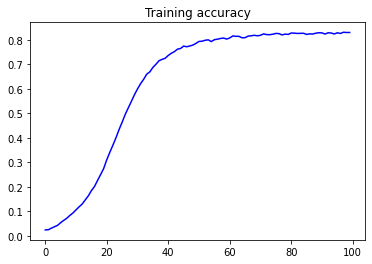

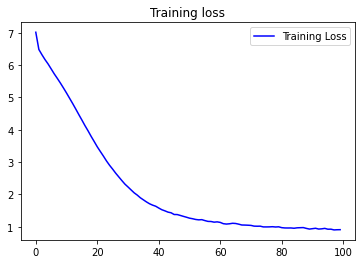

In [82]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [83]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope one youth with his sight did quickly steep hate light go report esteem survey report suppress'd gone not with me we dost dispense hide me know be name and thought so blessed fears i chide your delight survey date spite of nought now go esteem crush'd and a ground smoke sit appear smoke hence bow burn that i'll frailer spies knife spent set some sight so view but taken bow moan of crime thee his song might please his store he takes appear dead sit bow sit borrow'd new gift be dead most place and that i know not me
